# Module 5 Assignment: Analyzing Chlorophyll levels in Australian Coral Reefs

Welcome to this module's assignment! 

Carefully read each Markdown (text) cell, which include instructions and hints. Start by reading the background behind your upcoming tasks.

When you are done, submit your solution by saving it, then clicking on the blue submit button at the top of the page.

## Background:
You've just joined a marine conservation team analyzing ocean data from the Integrated Marine Observing System (IMOS) to monitor Australia's coastal ecosystems. Your job is to understand how patterns and behaviors of variables like chlorophyll and turbidity are evolving in time. This analysis is really important to create good policies and strategies for coral reef preservation.

You will be working with the daily average measurements given by the Australian Institute of Marine Biology. While the original dataset has one file per site, we have compiled the data for 3 sites into one single .csv file. You will be working with the following features:

* `STATION_ID`: ID of the measuring site
* `SAMPLE_DAY`: date of the sample
* `CHL_QA_AVG`: average daily concentration of chlorophyll per unit volume of the water body, measured in ug/L (micro grams per liter)
* `NTU_QA_AVG`: average turbidity of the water body measured in NTU (Nephelometric Turbidity Unit). Turbidity measures the cloudiness or haziness of a fluid due to suspended particles.


## In order for your submission to be graded correctly, you **MUST**:
* **Use the provided variable names**, otherwise the autograder will not be able to locate the variable for grading. 

* **Replace any instances of `None` with your own code.** 

* **Only modify the cells that start with the comment `# GRADED CELL`**.  

* **Use the provided cells for your solution.** You can add new cells to experiment, but these will be omitted when grading. 

To submit your solution, save it, then click on the blue submit button at the top of the page.

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 
</div>

## Table of Contents
- [Step 1: Importing Libraries](#step-1)
- [Step 2: Load the Data](#step-2)
    - [Formatting Dates](#formatting-dates)
        - [Exercise 1: Converting to DateTime](#ex1)
- [Step 3: Analyzing the Time Series](#step-3)
    - [Plot the Data](#plot-the-data)
        - [Exercise 2: Plotting the Time Series](#ex2)
    - [Smoothing the data](#smoothing-the-data)
        - [Exercise 3: Moving Average](#ex3)
        - [Exercise 4: Percent Change](#ex4)
    - [Chlorophyll Concentration per Month](#chlorophyll-concentration-over-the-years)
        - [Exercise 5: Average Monthly Chlorophyll Concentration by Site](#ex5)
- [Step 4: Modelling the Chlorophyll Concentration](#step-4)
    - [Linear Regression](#linear-regression)
        - [Exercise 6: Simple Linear Regression](#ex6)
        - [Exercise 7: Multiple Linear Regression](#ex7)
        - [Exercise 8: Assessing Your Model](#ex8)

<a id="step-1"></a>

## Step 1: Importing Libraries

Before you start working on the dataset, it is good practice to import all libraries at the beginning of your code. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Run the cell below to import the following libraries: Pandas, Matplotlib's Pyplot and Seaborn</li>
            <li>Inspect the cell to look at the aliases given to the import, such as <code>pd</code> for Pandas
        </ol>
</div>

In [1]:
# 🔒 This cell is locked. You will not be able to edit it.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

<a id="step-2"></a>

## Step 2: Load the Data

Now that you have imported the right libraries, you can use Pandas to load the data from the csv. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Run the cell below to:</li>
            <ol>
                <li>Import the data.</li>
                <li>Save the DataFrame into a variable named <code>df</code>.</li>
                <li>View the data using the <code>head()</code> method.</li>
            </ol>
        </ol>
</div>

In [2]:
# 🔒 This cell is locked. You will not be able to edit it.

# Load the data
df = pd.read_csv("data/combined_marine_dataset_3sites.csv")

df.head()

,STATION_ID,MMP_SITE_NAME,LONGITUDE,LATITUDE,LOGGER_SERIAL,SAMPLE_DAY,CHL_QA_AVG,NTU_QA_AVG
0,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-22,1.910,3.901
1,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-23,1.935,3.958
2,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-24,1.867,2.408
3,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-25,2.166,1.352
4,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-26,1.911,1.058


<a id="formatting-dates"></a>

### Formatting Dates

Having the data in the correct format enables many tools and calculations. Run the next cell to take a look at data type of the columns. In particular pay attention to the "SAMPLE_DAY" column.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Run the cell below to inspect the data types of each column.

In [3]:
# 🔒 This cell is locked. You will not be able to edit it.

# print the data types and check the result
print(df.dtypes)

STATION_ID        object
MMP_SITE_NAME     object
LONGITUDE        float64
LATITUDE         float64
LOGGER_SERIAL      int64
SAMPLE_DAY        object
CHL_QA_AVG       float64
NTU_QA_AVG       float64
dtype: object


As you can see, all data types reflect the data, except for the "SAMPLE_DAY" column, which you would like to be in `DateTime` format so you can make use of all its properties.

<a id="ex1"></a>

#### Exercise 1: Converting to DateTime

Convert the "SAMPLE_DAY" column to `DateTime`.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**

1. Convert the "SAMPLE_DAY" column to `DateTime` using an appropriate Pandas function and save it into the "SAMPLE_DAY" column.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To convert a column to datetime, you can use the `pd.to_datetime()` function
</details>


In [4]:
# GRADED CELL: Exercise 1

### START CODE HERE ###

df["SAMPLE_DAY"] = pd.to_datetime(df["SAMPLE_DAY"])

### END CODE HERE ###

In [5]:
# 🔒 This cell is locked. You will not be able to edit it.

# print the new data types and check the result
print(df.dtypes)

STATION_ID               object
MMP_SITE_NAME            object
LONGITUDE               float64
LATITUDE                float64
LOGGER_SERIAL             int64
SAMPLE_DAY       datetime64[ns]
CHL_QA_AVG              float64
NTU_QA_AVG              float64
dtype: object


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
STATION_ID               object
MMP_SITE_NAME            object
LONGITUDE               float64
LATITUDE                float64
LOGGER_SERIAL             int64
SAMPLE_DAY       datetime64[ns]
CHL_QA_AVG              float64
NTU_QA_AVG              float64
dtype: object
```
</small>

</details>

<a id="step-3"></a>

## Step 3: Analyzing the time series

You want to know if the chlorophyll concentration and turbidity have changed over the years. Begin by analyzing the "Burdekin River" site measurements. 

<a id="plot-the-data"></a>
### Plot the data 

<a id="ex2"></a>

#### Exercise 2: Plotting a time series
<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Filter the DataFrame to keep only the measurements where "STATION_ID" equals "BUR13" </li>
            <li>Now that you are considering only one measuring site, and thus the dates are not repeated, change the index of the DataFrame to "SAMPLE DAY"</li>
            <li>Using Pandas' methods for DataFrames, create two separate plots, one showing the average chlorophyll concentration (<code>CHL_QA_AVG</code>) and another with the average turbidity level (<code>NTU_QA_AVG</code>)</li>
            <ul>
                <li>You should create the first plot in the cell below (exercise 2a) and the second plot in the next cell (exercise 2b).</li>
            </ul>
            <li>Make sure to store the plots in variables for grading. The names of the variables should be <code>ax_bur13_chl</code> and <code>ax_bur13_ntu</code> respectively.
        </ol>
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To change the index of the DataFrame you can use the `set_index()` method with the name of the column you want as the new index. Do not forget to also set the `inplace` argument to True, so your changes hold.
- To plot a DataFrame you can use `sns.lineplot()`.
- In order to select the appropriate columns for the y axis values, you need to set the`y` argument with the column name you need.
</details>


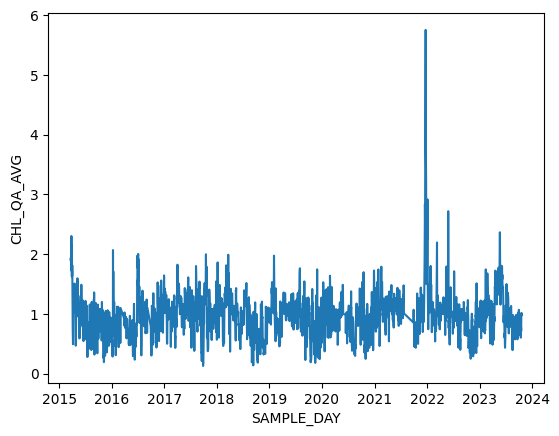

In [11]:
# GRADED CELL: exercise 2a

plt.figure()

### START CODE HERE ###

# filter the dataset
df_bur13 = df[df["STATION_ID"]=="BUR13"]

# set the index to the "SAMPLE_DAY" column
df_bur13.set_index("SAMPLE_DAY",inplace=True)

# create the chlorophyll plot
ax_bur13_chl = sns.lineplot(df_bur13,x=df_bur13.index,y="CHL_QA_AVG")

### END CODE HERE ###

plt.show()

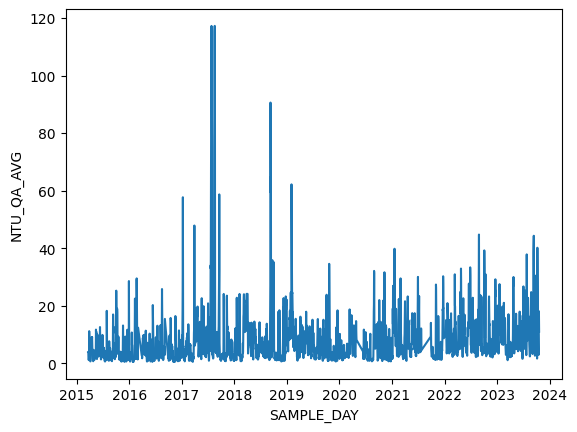

In [12]:
# GRADED CELL: exercise 2b

plt.figure()

### START CODE HERE ###

# Create the plot for the turbidity
ax_bur13_ntu = sns.lineplot(df_bur13,x=df_bur13.index,y="NTU_QA_AVG")

### END CODE HERE ###

plt.show()

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/CHLts.png" width="400">
<br>
<img src="imgs/NTUts.png" width="400">

</details>

<a id="smoothing-the-data"></a>

### Smoothing the data

<a id="ex3"></a>

#### Exercise 3: Moving average

Chlorophyll plays a vital role in monitoring long-term nutrient pollution, as nutrient-driven algae growth poses a significant threat to coral ecosystems. Elevated chlorophyll-a levels can indicate nutrient pollution, which harms coral survival. To better understand long-term trends and minimize short-term fluctuations, apply a moving average to smooth the data. Start with a 7-day window, representing a weekly average. What happens if you take a window of 30, representing a monthly average?

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
<ol>
    <li>Plot the original time series using index as x and "CHL_QA_AVG" as y. Save the plot in a variable named <code>ax_moving_average.</code></li>
    <ul>
        <li>Add a label "Original".</li>
    </ul>
    <li>Using Pandas methods for Series, find the moving average for the "BUR13" chlorophyll timeseries with a window of 30, which corresponds to about a month.</li>
    <li>Plot the smoothed time series.</li>
    <ul>
        <li>Add a label "30 day window".</li>
    </ul>
    <li>Add a grid to your plot. Set the color to "gray", linestyle to "-", linewidth to 0.5 and alpha to 0.3.</li>
</ol>
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To find the moving average for a time series, you need to chain two methods: `rolling` followed by `mean`
- The [`🔗rolling()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html) method has one mandatory argument, `window`, which corresponds to the window length of the moving average
</ul>
</details>

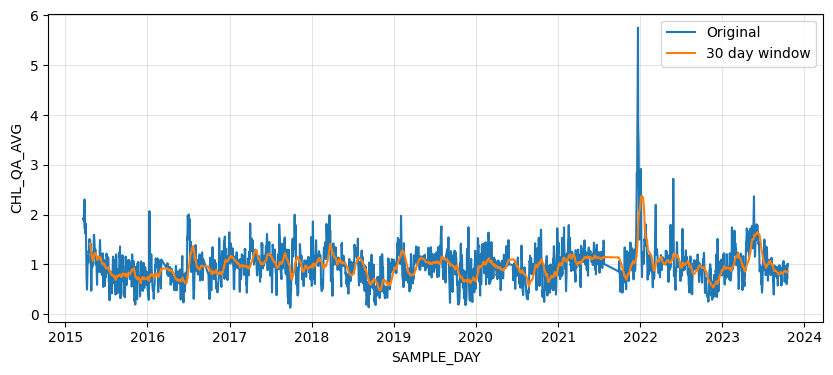

In [17]:
# GRADED CELL: exercise 3

plt.figure(figsize=(10, 4))

### START CODE HERE ###

# plot the original chlorophyll data
ax_moving_average = sns.lineplot(df_bur13,x=df_bur13.index,y="CHL_QA_AVG", label="Original")

# find the moving average for a window of length 30
bur13_moving_average = df_bur13["CHL_QA_AVG"].rolling(window=30).mean()

# plot the moving average 
sns.lineplot(bur13_moving_average, label="30 day window")

# Add the grid
ax_moving_average.grid(color="gray", linestyle="-", linewidth=0.5, alpha=0.3)

### END CODE HERE ###

# Add the legend
plt.legend()

plt.show()

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ma.png" width="400">

</details>

<a id="ex3"></a>

#### Exercise 4: Percent change

Turbidity helps us keep track of sediment pollution. High sediment levels can quickly harm coral reefs, especially after big storms or activities like dredging, which affect coral health and photosynthesis. To monitor sudden sediment stress, it's important to spot big changes. Can you figure out when the biggest jump between two days happened in the turbidity measurements? You can use the percent change to answer this question.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
<ol>
    <li>Find the percent change of the turbidity measurements for the "BUR13" site. Since turbidity has one missing value in 2022, you need to set the argument <code>fill_method=None</code>, otherwise you will get a warning.</li>
    <li>Use <code>.abs()</code> and <code>.max()</code> to find the largest absolute percent change./li>
    <li>Find the index (date) of the maximum percent change (in absolute value). (already implemented)</li>
</ol>
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To find the percent change, you can use the [🔗`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.pct_change.html) method for Series. It returns a number between 0 and 1, so if you want it in percent you need to multiply the result by 100
- To find the maximum percent change, you can use the [`🔗max()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.max.html) method. Remember to first find the absolute value of the percent change using [`abs()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.abs.html). You can chain these two operations to get a one liner solution
- To find the date of the maximum percent change, you need to select the row in the `chl_pct_change` Series where the maximum value occurs, and then get the index of that row with the `index` attribute. You can do it all in just one line of code
</ul>
</details>

In [19]:
# GRADED CELL: Exercise 4

### START CODE HERE ###

# calculate the percent change in turbidity ("NTU_QA_AVG"). Use fill_method=None
chl_pct_change = df_bur13["NTU_QA_AVG"].pct_change(fill_method=None) * 100

# find the value of the highest percent change
max_pct_change_value = chl_pct_change.abs().max()

### END CODE HERE ###

# find the index (date) where the maximum (absolute) percent change occurs
max_pct_change_date = chl_pct_change[chl_pct_change == max_pct_change_value].index

In [20]:
# 🔒 This cell is locked. You will not be able to edit it.

# print the results
print("The maximum percent change value happened on",max_pct_change_date[0],
      "with a value of", round(max_pct_change_value,2), "%")

The maximum percent change value happened on 2019-12-18 00:00:00 with a value of 1430.64 %


Was this the date you expected?

<a id="chlorophyll-concentration-over-the-years"></a>

### Chlorophyll Concentration per Month 

In order to see if the chlorophyll concentration has a distinct pattern throughout the year, you want to visualize the mean concentration by month on a line chart. Create a column chart showing the average chlorophyll concentration per month for each site.

<a id="ex5"></a>

#### Exercise 5: Average Monthly Chlorophyll Concentration by Site

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
<ol>
    <li>Add a new column called "MONTH" to the <code>df</code> DataFrame with the month of each measurement</li>
    <li>Create a pivot table from the <code>df</code> DataFrame, using "MONTH" as index, "STATION_ID" as columns, and "CHL_QA_AVG" as values. Aggregate the data by the mean</li>
    <li>Create a line chart of the pivoted data. Assign it to the <code>ax_monthly_chl</code> variable</li>
    <li>Customize the plot:</li>
    <ul>
        <li>Set the x-label to "Month", with a font size of 14</li>
        <li>Set the y-label to "Average Chlorophyll concentration (ug/L)", with a font size of 14</li>
        <li>Set the title to "Average chlorophyll concentration per month", with a font size of 16</li>
        <li>Set the xticks rotation to 0 degrees (horizontal), and a font size of 10</li>
        <li>Add the title "Station ID" to the legend</li>
    </ul>
</ol>
</div>

**Please do not make any other changes to the plot, otherwise you might fail the grader.**

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To find the month you can select the `.dt.month` attribute on the "SAMPLE_DAY" column
- To pivot the data use the `pivot_table()` method
- Set the figure size with an appropriate argument of the `plt.figure()` method
- Create the line plot using the `sns.lineplot()` function
- To change the x and y-axis labels, use `plt.xlabel()` and `plt.ylabel()` respectively
- For the title you can use `plt.title()`
- To change the title of the legend you need to call `plt.legend()` and set the argument `title` with the desired text
- To rotate the x axis labels you can use `plt.xticks()` and set the argument `rotation`
</ul>
</details>

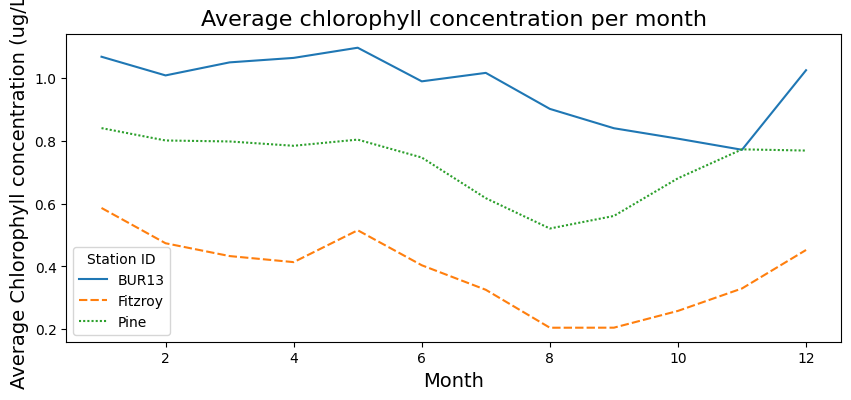

In [24]:
# GRADED CELL: Exercise 5

### START CODE HERE ###

# add the MONTH column, you can use the .dt.month method for this
df["MONTH"] = df["SAMPLE_DAY"].dt.month

# pivot the table
pivoted_df = df.pivot_table(index="MONTH",
                      columns="STATION_ID",
                      values="CHL_QA_AVG",
                      aggfunc="mean"
                      ) 

# set the figure size to (10,4)
plt.figure(figsize=(10,4))

# create the line plot
ax_monthly_chl = sns.lineplot(pivoted_df)

# set the x label
plt.xlabel("Month",fontsize=14)

# set the ylabel
plt.ylabel("Average Chlorophyll concentration (ug/L)",fontsize=14)

# change the legend title
plt.legend(title="Station ID")

# set the rotation for the xticks
plt.xticks(rotation=0,fontsize=10)

# set the title
plt.title("Average chlorophyll concentration per month",fontsize=16)

### END CODE HERE ###

plt.show()

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/grouped_bar.png" width="400">

</details>

Try answering these questions:
* Are there any visible patterns in the data that might suggest a predictable behavior? See if there's a time of the year where the average goes up or down
* If you can find a pattern, is it the same across all sites?
* Which is the site with the highest average chlorophyll concentration throughout the year?
* A chlorophyll concentration above 0.7 is considered dangerous for coral reefs. On average, how well (or how bad) are these three sites doing?

<a id="step-4"></a>

## Step 4: Modelling the chlorophyll concentration

High chlorophyll concentrations at the Burdekin River site can indicate dangerous algal blooms that threaten coral reef health by reducing their access to light and oxygen. Building models to predict these concentrations would enable early warning systems and more timely conservation interventions to protect this vulnerable section of the Great Barrier Reef.

<a id="linear-regression"></a>

### Linear Regression 

Linear regression provides an interpretable baseline to identify long-term trends in chlorophyll concentrations.

<a id="ex6"></a>

#### Exercise 6: Simple Linear Regression

You decide to start with a simple linear regression using the day number of the measurement.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Add a column called `idx` to assign a number to each day starting from 0.
2. Define your predictors to be the new column `idx`.
3. Create variables `X_simple` and `Y` for the regression model.
4. Define and train your model.
        
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To create the values for the new `idx` column, you can use the function `range()`. Remember you need as many values as there are rows in `df_bur13_chl`
- Since you are creating a simple linear regression, in this case your only regressor is variable `idx`
- To define the regressors for the linear regression model, you need to add the constant term. Do that with the `sm.add_constant()` function
- To create the target variable `Y` you need to select the `"CHL_QA_AVG"` column
- Define the linear regression model with the `sm.OLS()` function. Remember the first argument must be the target variable, and the second one corresponds to the regressors
- In order to fit the model, you can use the `fit()` method for the OLS model
</ul>
</details>

In [26]:
# GRADED CELL: Exercise 6

# create a dataframe with the chlorophyll data for the BUR13 station
df_bur13_chl = df_bur13[["CHL_QA_AVG"]]

### START CODE HERE ###

# Add the 'idx' column to df_bur13
df_bur13_chl["idx"] = range(len(df_bur13_chl))

# define the predictors
predictors_simple = ["idx"]

# define X_simple
X_simple = sm.add_constant(df_bur13_chl[predictors_simple])

# define Y (target)
Y = df_bur13_chl["CHL_QA_AVG"]

# define the model
model_simple = sm.OLS(Y,X_simple)

# train the model
results_simple = model_simple.fit()

### END CODE HERE ###

/tmp/ipykernel_93/1941179213.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bur13_chl["idx"] = range(len(df_bur13_chl))


In [27]:
# 🔒 This cell is locked. You will not be able to edit it.

# print the summary
print(results_simple.summary())

                            OLS Regression Results                            
Dep. Variable:             CHL_QA_AVG   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     31.48
Date:                Wed, 14 May 2025   Prob (F-statistic):           2.20e-08
Time:                        01:44:52   Log-Likelihood:                -1247.6
No. Observations:                3009   AIC:                             2499.
Df Residuals:                    3007   BIC:                             2511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9075      0.013     67.949      0.0

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
OLS Regression Results                            
==============================================================================
Dep. Variable:             CHL_QA_AVG   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     32.01
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.67e-08
Time:                        14:50:51   Log-Likelihood:                -1252.8
No. Observations:                3026   AIC:                             2510.
Df Residuals:                    3024   BIC:                             2522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9065      0.013     68.107      0.000       0.880       0.933
idx         4.312e-05   7.62e-06      5.658      0.000    2.82e-05    5.81e-05
==============================================================================
Omnibus:                     1680.700   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45646.961
Skew:                           2.104   Prob(JB):                         0.00
Kurtosis:                      21.556   Cond. No.                     3.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
```

</small>

</details>

Analyze your model. Look at the R-squared, and at the coefficients of the model. Are all the variables statistically significant? What can you say about the error?

You can also visualize the model by plotting the line generated by the coefficients, along with a scatter plot of the dependent and independent variables.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Run the cell below to get the Chlorophyll concentration vs. `idx` plot, along with the learned model
</div>

/tmp/ipykernel_93/2702055996.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = params[1]
/tmp/ipykernel_93/2702055996.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = params[0]


Text(0.5, 1.0, 'Scatter plot of Chlorophyll concentration with prediction line')

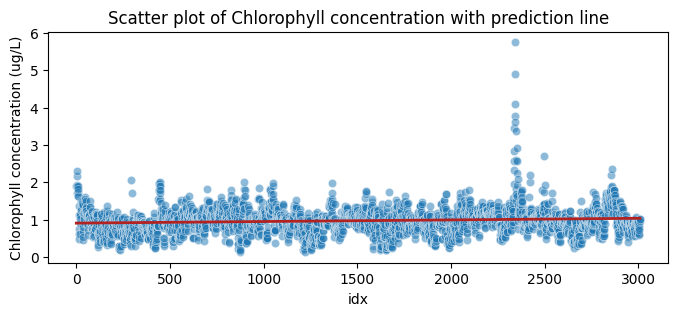

In [28]:
# 🔒 This cell is locked. You will not be able to edit it.

# retrieve the coefficients
params = results_simple.params

a = params[1]
b = params[0]

# define the prediction line
line = a * df_bur13_chl["idx"] + b

# create a scarper plot with the independent vs. dependent variable
plt.figure(figsize=(8,3))
sns.scatterplot(x=df_bur13_chl["idx"], y=df_bur13_chl["CHL_QA_AVG"], alpha=0.5)

# add the prediction line
sns.lineplot(x=df_bur13_chl["idx"], y=line, color="firebrick", linewidth=2)

# change y label and add title
plt.ylabel("Chlorophyll concentration (ug/L)")
plt.title("Scatter plot of Chlorophyll concentration with prediction line")

<a id="ex7"></a>

#### Exercise 7: Multiple Linear Regression

In Exercise 5, you should have seen that chlorophyll concentrations tend to go down during the last months of the year. You decide to add this data as a regressor in your model

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Add the column ["MONTH"] to the `df_bur13_chl` DataFrame
2. Define the predictors for this model (two in this case)
3. Prepare the predictors by taking the columns defined in `predictors_multi` and adding the constant term
4. Define and train the new model. Do it one line using method chaining
        
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To get the data for the new column "MONTH" you need to extract the month from the DataFrame index. Since the index is a datetime, use the `month` method
- To prepare the regressors for the linear regression model, you need to add the constant term. Do that with the `sm.add_constant()` function
- Define the linear regression model with the `sm.OLS()` function. Remember the first argument must be the target variable, and the second one corresponds to the regressors
- In order to fit the model, you can use the `fit()` method for the OLS model
</ul>
</details>

In [31]:
# GRADED CELL: Exercise 7

### START CODE HERE ###

# add a MONTH column
df_bur13_chl["MONTH"] = df_bur13.index.month

# define the predictors
predictors_multi = ["idx","MONTH"]

# define X_multi - remember to create a constant column
X_multi = sm.add_constant(df_bur13_chl[predictors_multi])

# define the model. Use the same target Y as before
model_multi = sm.OLS(Y,X_multi)

# train the model
results_multi = model_multi.fit()

### END CODE HERE ###

/tmp/ipykernel_93/1680663337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bur13_chl["MONTH"] = df_bur13.index.month


In [32]:
# 🔒 This cell is locked. You will not be able to edit it.

# print the summary
print(results_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             CHL_QA_AVG   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     76.40
Date:                Wed, 14 May 2025   Prob (F-statistic):           4.33e-33
Time:                        01:54:09   Log-Likelihood:                -1188.7
No. Observations:                3009   AIC:                             2383.
Df Residuals:                    3006   BIC:                             2401.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0459      0.018     57.479      0.0

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
OLS Regression Results                            
==============================================================================
Dep. Variable:             CHL_QA_AVG   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     77.21
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.98e-33
Time:                        14:41:02   Log-Likelihood:                -1193.4
No. Observations:                3026   AIC:                             2393.
Df Residuals:                    3023   BIC:                             2411.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0452      0.018     57.613      0.000       1.010       1.081
idx         4.219e-05   7.47e-06      5.645      0.000    2.75e-05    5.68e-05
MONTH         -0.0211      0.002    -11.006      0.000      -0.025      -0.017
==============================================================================
Omnibus:                     1917.438   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67396.221
Skew:                           2.463   Prob(JB):                         0.00
Kurtosis:                      25.589   Cond. No.                     4.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
```

</small>

</details>

<a id="ex8"></a>

#### Exercise 8: Assessing Your Model

Now it is time to assess your model. You will use the mean absolute error (MAE) and plot a regplot to analyze how good your model is.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Find the predicted values for `X_multi`
4. Calculate the residuals
5. Use the residuals to calculate the Mean Absolute Error (MAE)
        
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- You can use the `predict()` method to get the model's predictions
- To find the residues, remember they defined are the difference between the actual values and the predicted ones: $r = y_{actual} - y_{predicted}$
- The MAE, as its name suggests, is the mean of the absolute value of the errors, a.k.a. the residuals: $MAE = \frac1n\sum{|r|}$ 
</details>

In [33]:
# GRADED CELL: Exercise 8

### START CODE HERE ###

# get the predicted values for X_multi
y_pred = results_multi.predict(X_multi)

# compute the residuals
residuals = Y - y_pred

# compute the MAE
MAE = residuals.abs().mean()

### END CODE HERE ###

print("MAE:", round(MAE,4)) 

MAE: 0.2497


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
MAE: 0.2497
```
</small>

</details>

Now you can create a regression plot for the actual vs. predicted values as another method for assessing gow good your model is.

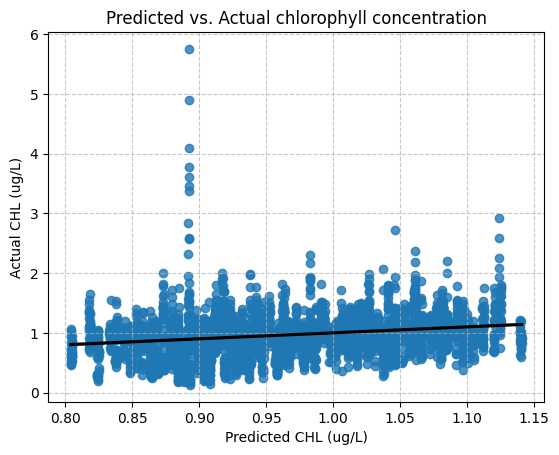

In [34]:
# create the regression plot
regplot = sns.regplot(x=y_pred, y=Y, line_kws={'color': 'black'})

# change the x label
plt.xlabel("Predicted CHL (ug/L)")

# change the y label
plt.ylabel("Actual CHL (ug/L)")

# add a title
plt.title("Predicted vs. Actual chlorophyll concentration")

# add a grid
plt.grid(alpha=0.7, linestyle="--")

plt.show()

What can you say about your new model? Do you believe it's better than the simple linear regression?

Congratulations on finishing this graded lab! If everything is running correctly, you can go ahead and submit your code for grading.